In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
all_envs = [1]
all_germs = [1]
all_hards = [1, 0]
all_pA = [0, 0.25, 0.5, 0.75, 1]
all_pGermBH = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
all_pGermWT = [0.7, 0.8, 0.9, 1]
all_bankLength = [5]
all_wB = [0.75, 0.8, 0.85, 0.9, 0.95, 0.99]
all_N = [1.0,2.0,4.0,10.0,21.0,46.0,100.0,215.0,464.0,1000.0]

In [61]:
# import data
df = pd.read_csv('delayedgerm_results_maxn=10000.csv', header=0)
df

,N,NPfix,envs,germs,hards,pA,pGermBH,pGermWT,bankLength,wB
0,1.0,1.000000,es,gs,hs,1.0,0.3,0.8,5,0.99
1,2.0,0.772078,es,gs,hs,1.0,0.3,0.8,5,0.99
2,7.0,0.132629,es,gs,hs,1.0,0.3,0.8,5,0.99
3,21.0,0.008967,es,gs,hs,1.0,0.3,0.8,5,0.99
4,59.0,0.000000,es,gs,hs,1.0,0.3,0.8,5,0.99
...,...,...,...,...,...,...,...,...,...,...
26395,166.0,0.000000,es,gs,hs,0.0,0.6,1.0,5,0.80
26396,464.0,0.000000,es,gs,hs,0.0,0.6,1.0,5,0.80
26397,1291.0,0.000000,es,gs,hs,0.0,0.6,1.0,5,0.80
26398,3593.0,0.000000,es,gs,hs,0.0,0.6,1.0,5,0.80


In [62]:
def filter_df(df, var1_name, var1_val, var2_name, var2_val, var3_name, var3_val, var4_name=None, var4_val=None):
    df = df[(df[var1_name] == var1_val) & (df[var2_name] == var2_val) & (df[var3_name] == var3_val)]
    if var4_name:
        df = df[df[var4_name] == var4_val]
    return df

In [63]:
def flatten_items(d):
    res = []
    for k, v in d.items():
        res.append(k)
        res.append(v)
    return res

In [64]:
def plot_npfix(df, var_name, var_vals, title, save=False, log=True):
    # plot NPfix vs N for each value of var_name
    fig, ax = plt.subplots(dpi=300, figsize=(12, 6))
    for val in var_vals:
        sub_df = df[df[var_name] == val]
        ax.plot(sub_df['N'], sub_df['NPfix'], label=val)
    # add horizontal line for neutral
    ax.axhline(y=1, color='black', linestyle='--')
    ax.set_xscale('log')
    if log:
        ax.set_yscale('log')
    ax.set_xlabel('N')
    ax.set_ylabel('NPfix')
    ax.set_title(title.replace('_', ' '))
    ax.legend(title=var_name)
    if save:
        plt.savefig(title + '.png')
    plt.show()

### Npfix vs wB, hard selection

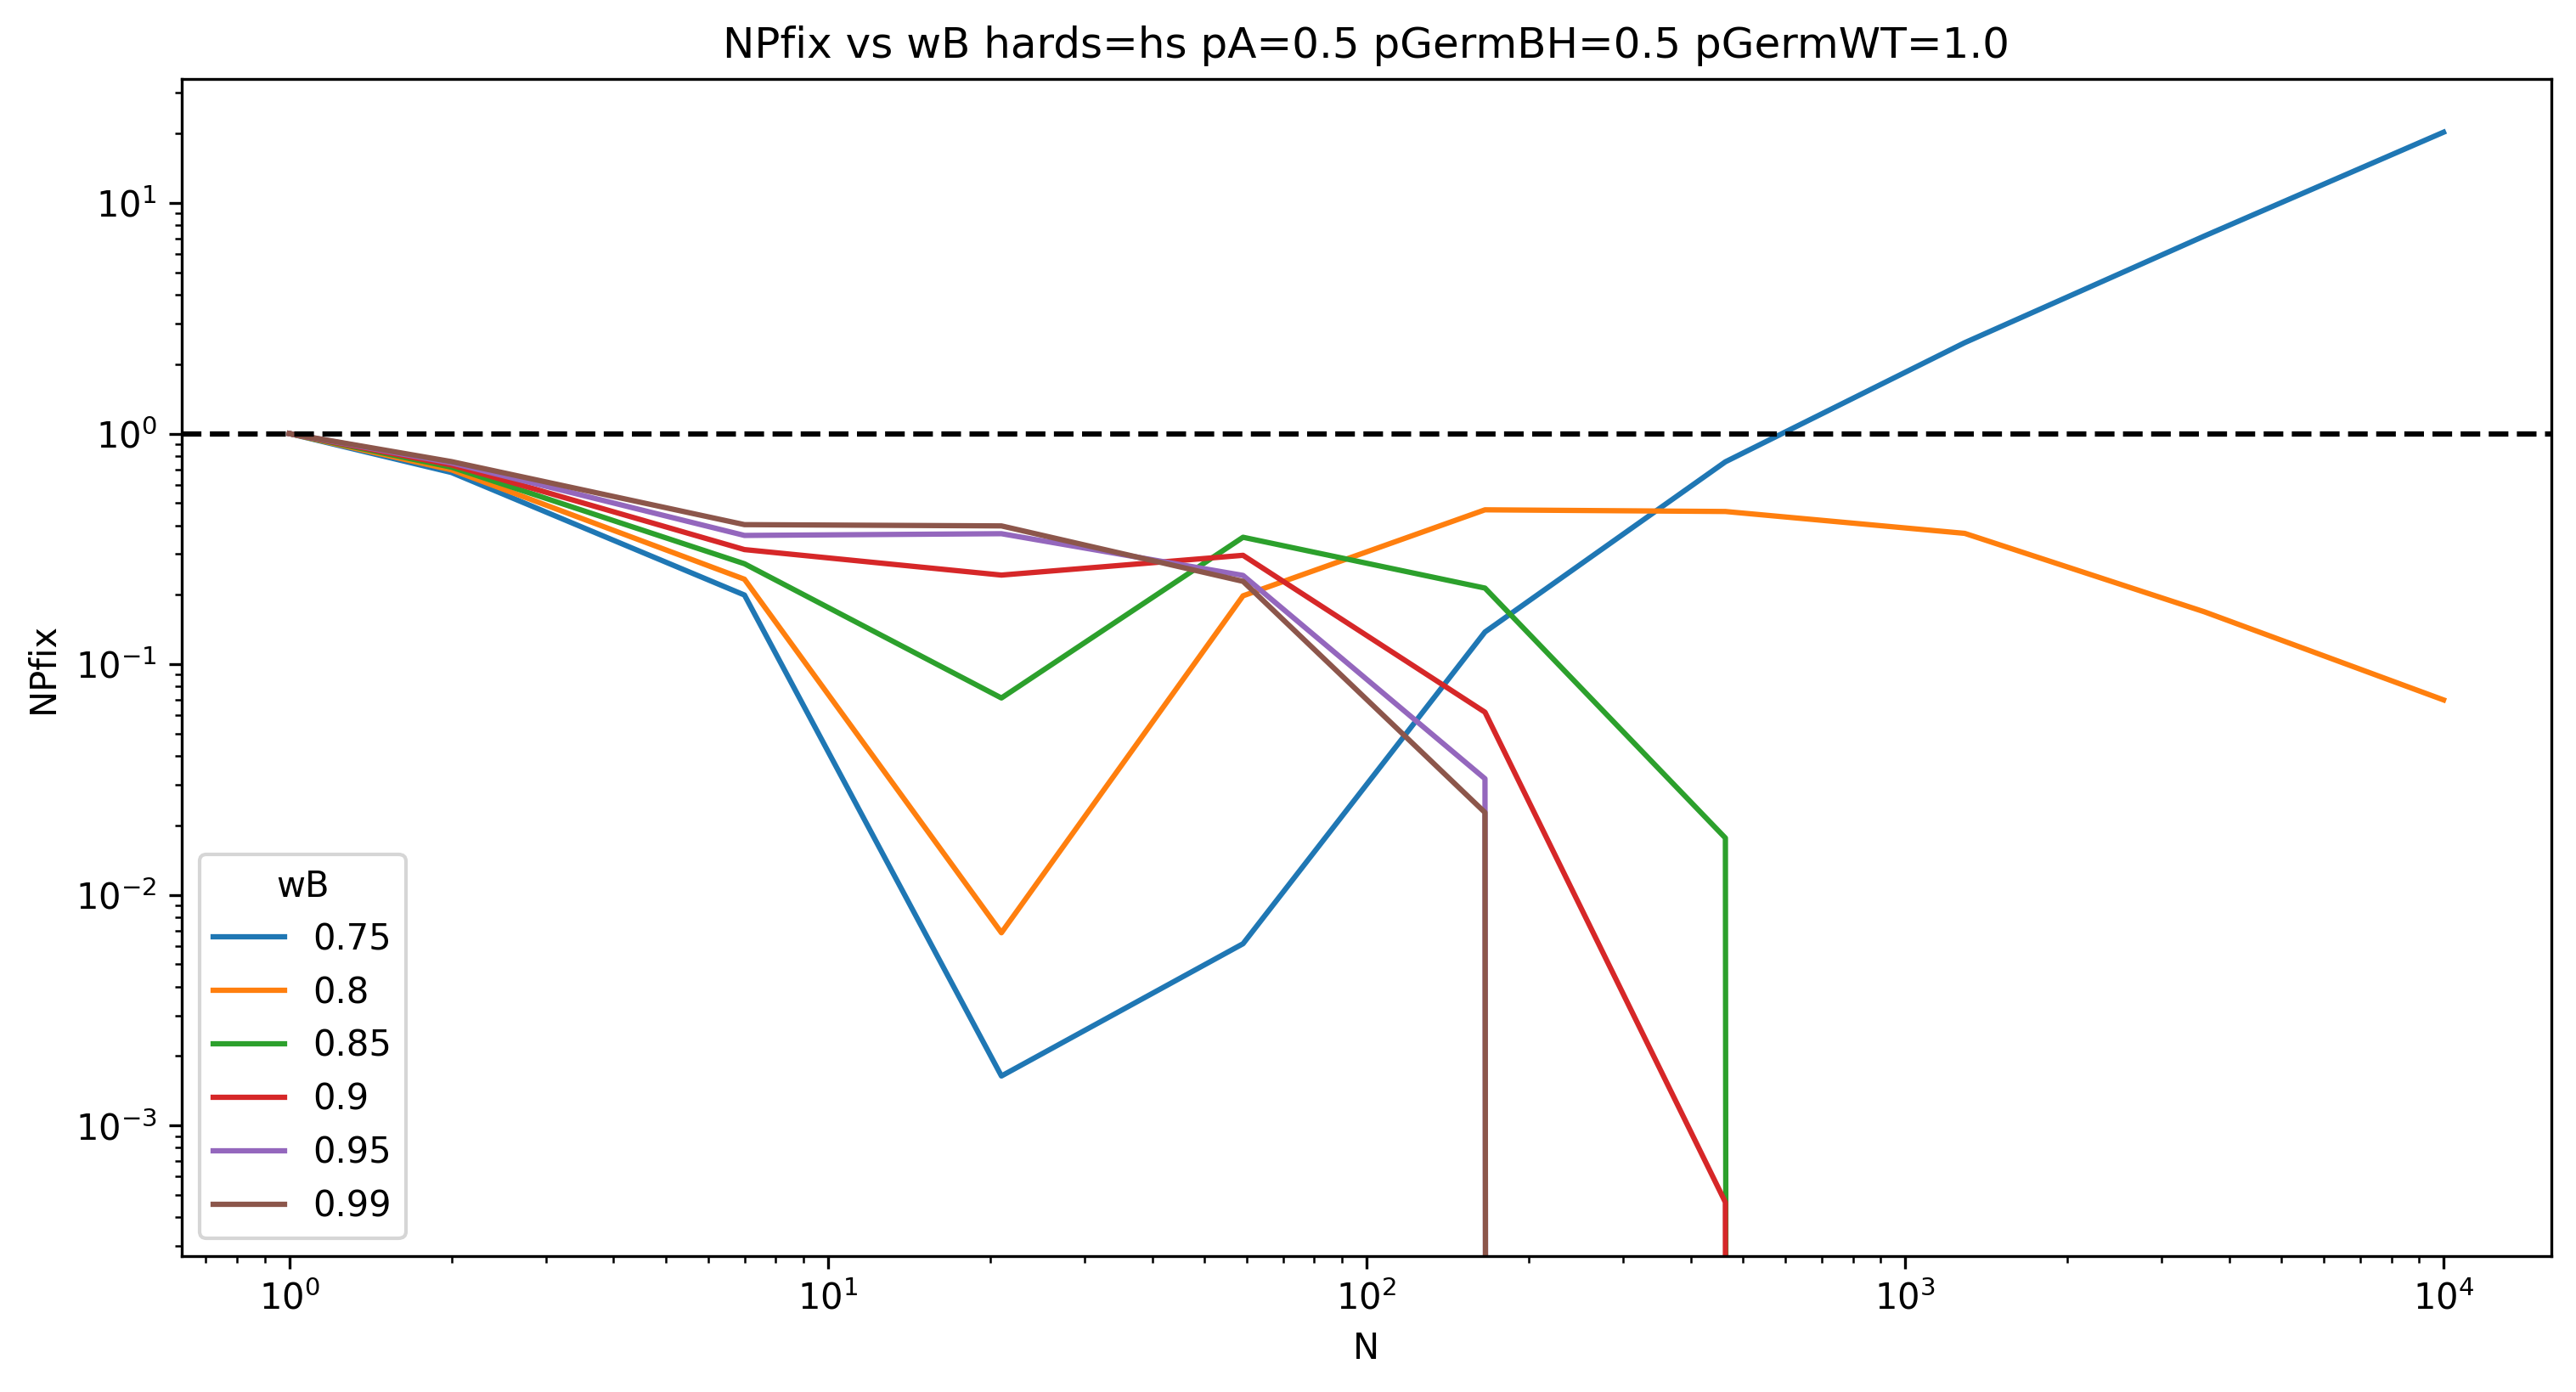

In [66]:
filter_params = {
    'hards': 'hs',
    'pA': 0.5,
    'pGermBH': 0.5,
    'pGermWT': 1.0
}
filter_params_flattened = flatten_items(filter_params)
plot_npfix(filter_df(df, *filter_params_flattened),
           'wB', all_wB, 
           'NPfix_vs_wB_' + '_'.join([f'{k}={v}' for k, v in filter_params.items()]),
           save=False)

### Npfix vs wB, soft selection

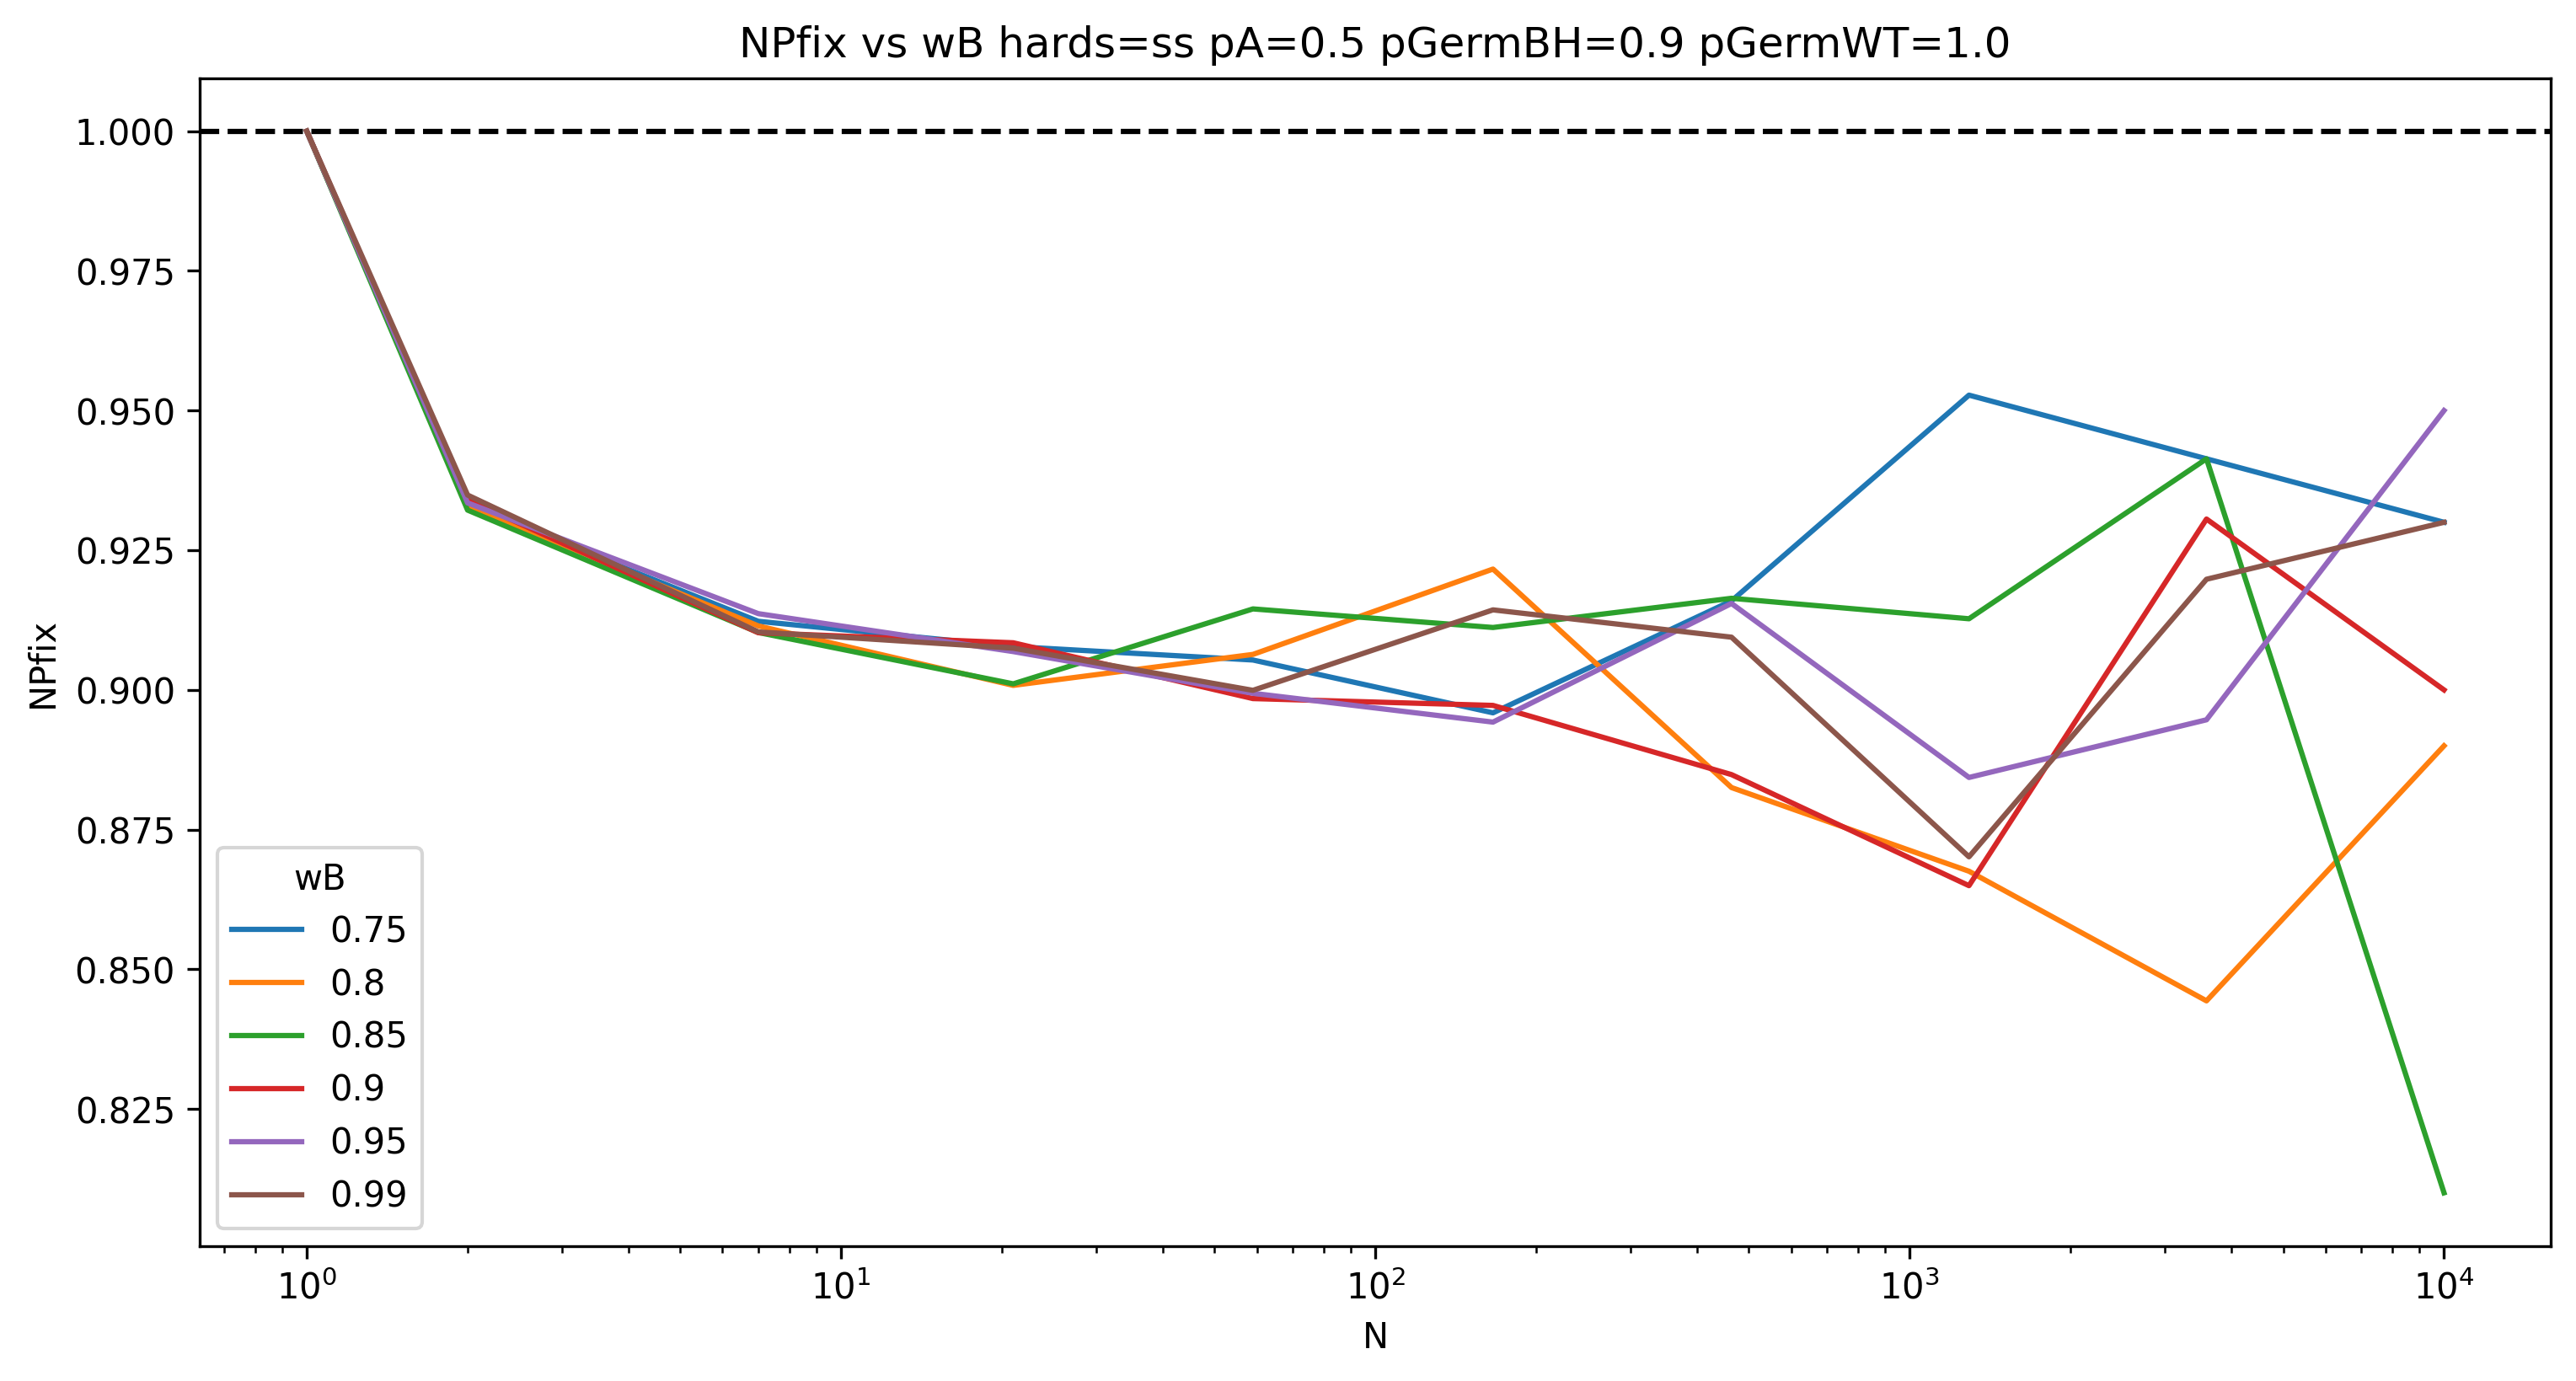

In [71]:
filter_params = {
    'hards': 'ss',
    'pA': 0.5,
    'pGermBH': 0.9,
    'pGermWT': 1.0
}
filter_params_flattened = flatten_items(filter_params)
plot_npfix(filter_df(df, *filter_params_flattened),
           'wB', all_wB,
           'NPfix_vs_wB_' +
           '_'.join([f'{k}={v}' for k, v in filter_params.items()]),
           log=False, save=False)

### Npfix vs pA, hard selection

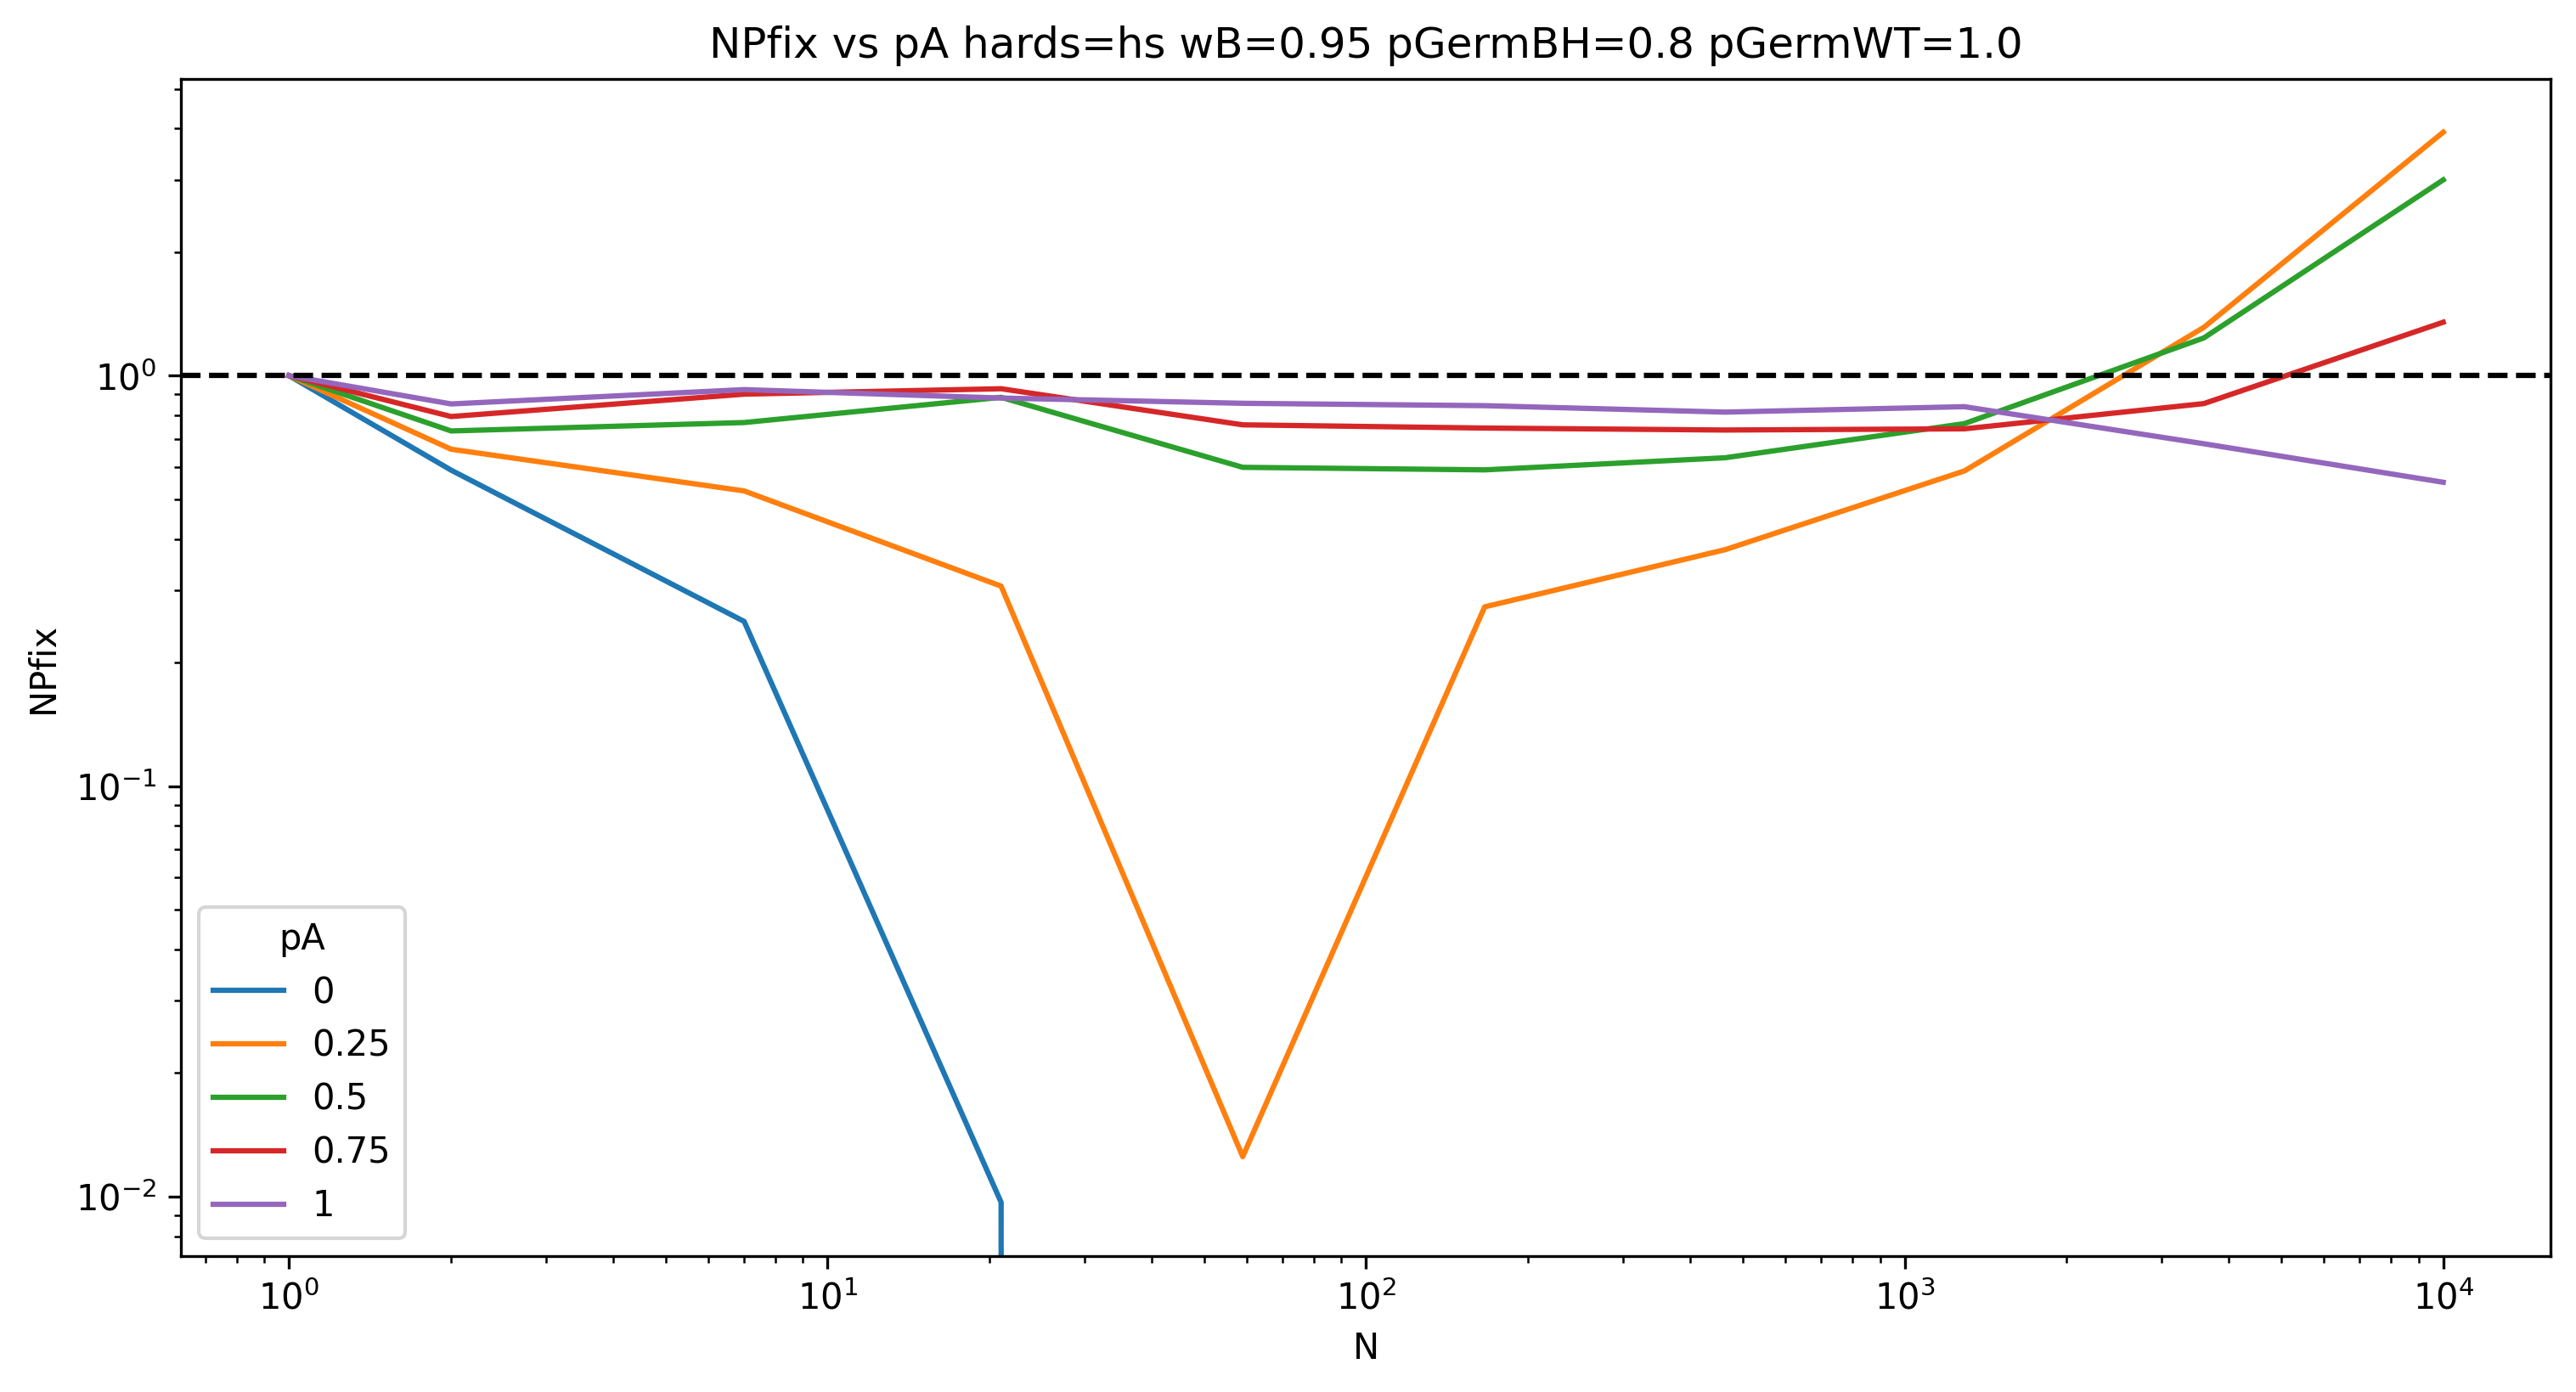

In [76]:
filter_params = {
    'hards': 'hs',
    'wB': 0.95,
    'pGermBH': 0.8,
    'pGermWT': 1.0
}
filter_params_flattened = flatten_items(filter_params)
plot_npfix(filter_df(df, *filter_params_flattened),
           'pA', all_pA,
           'NPfix_vs_pA_' +
           '_'.join([f'{k}={v}' for k, v in filter_params.items()]),
           save=False)

### Npfix vs pA, soft selection

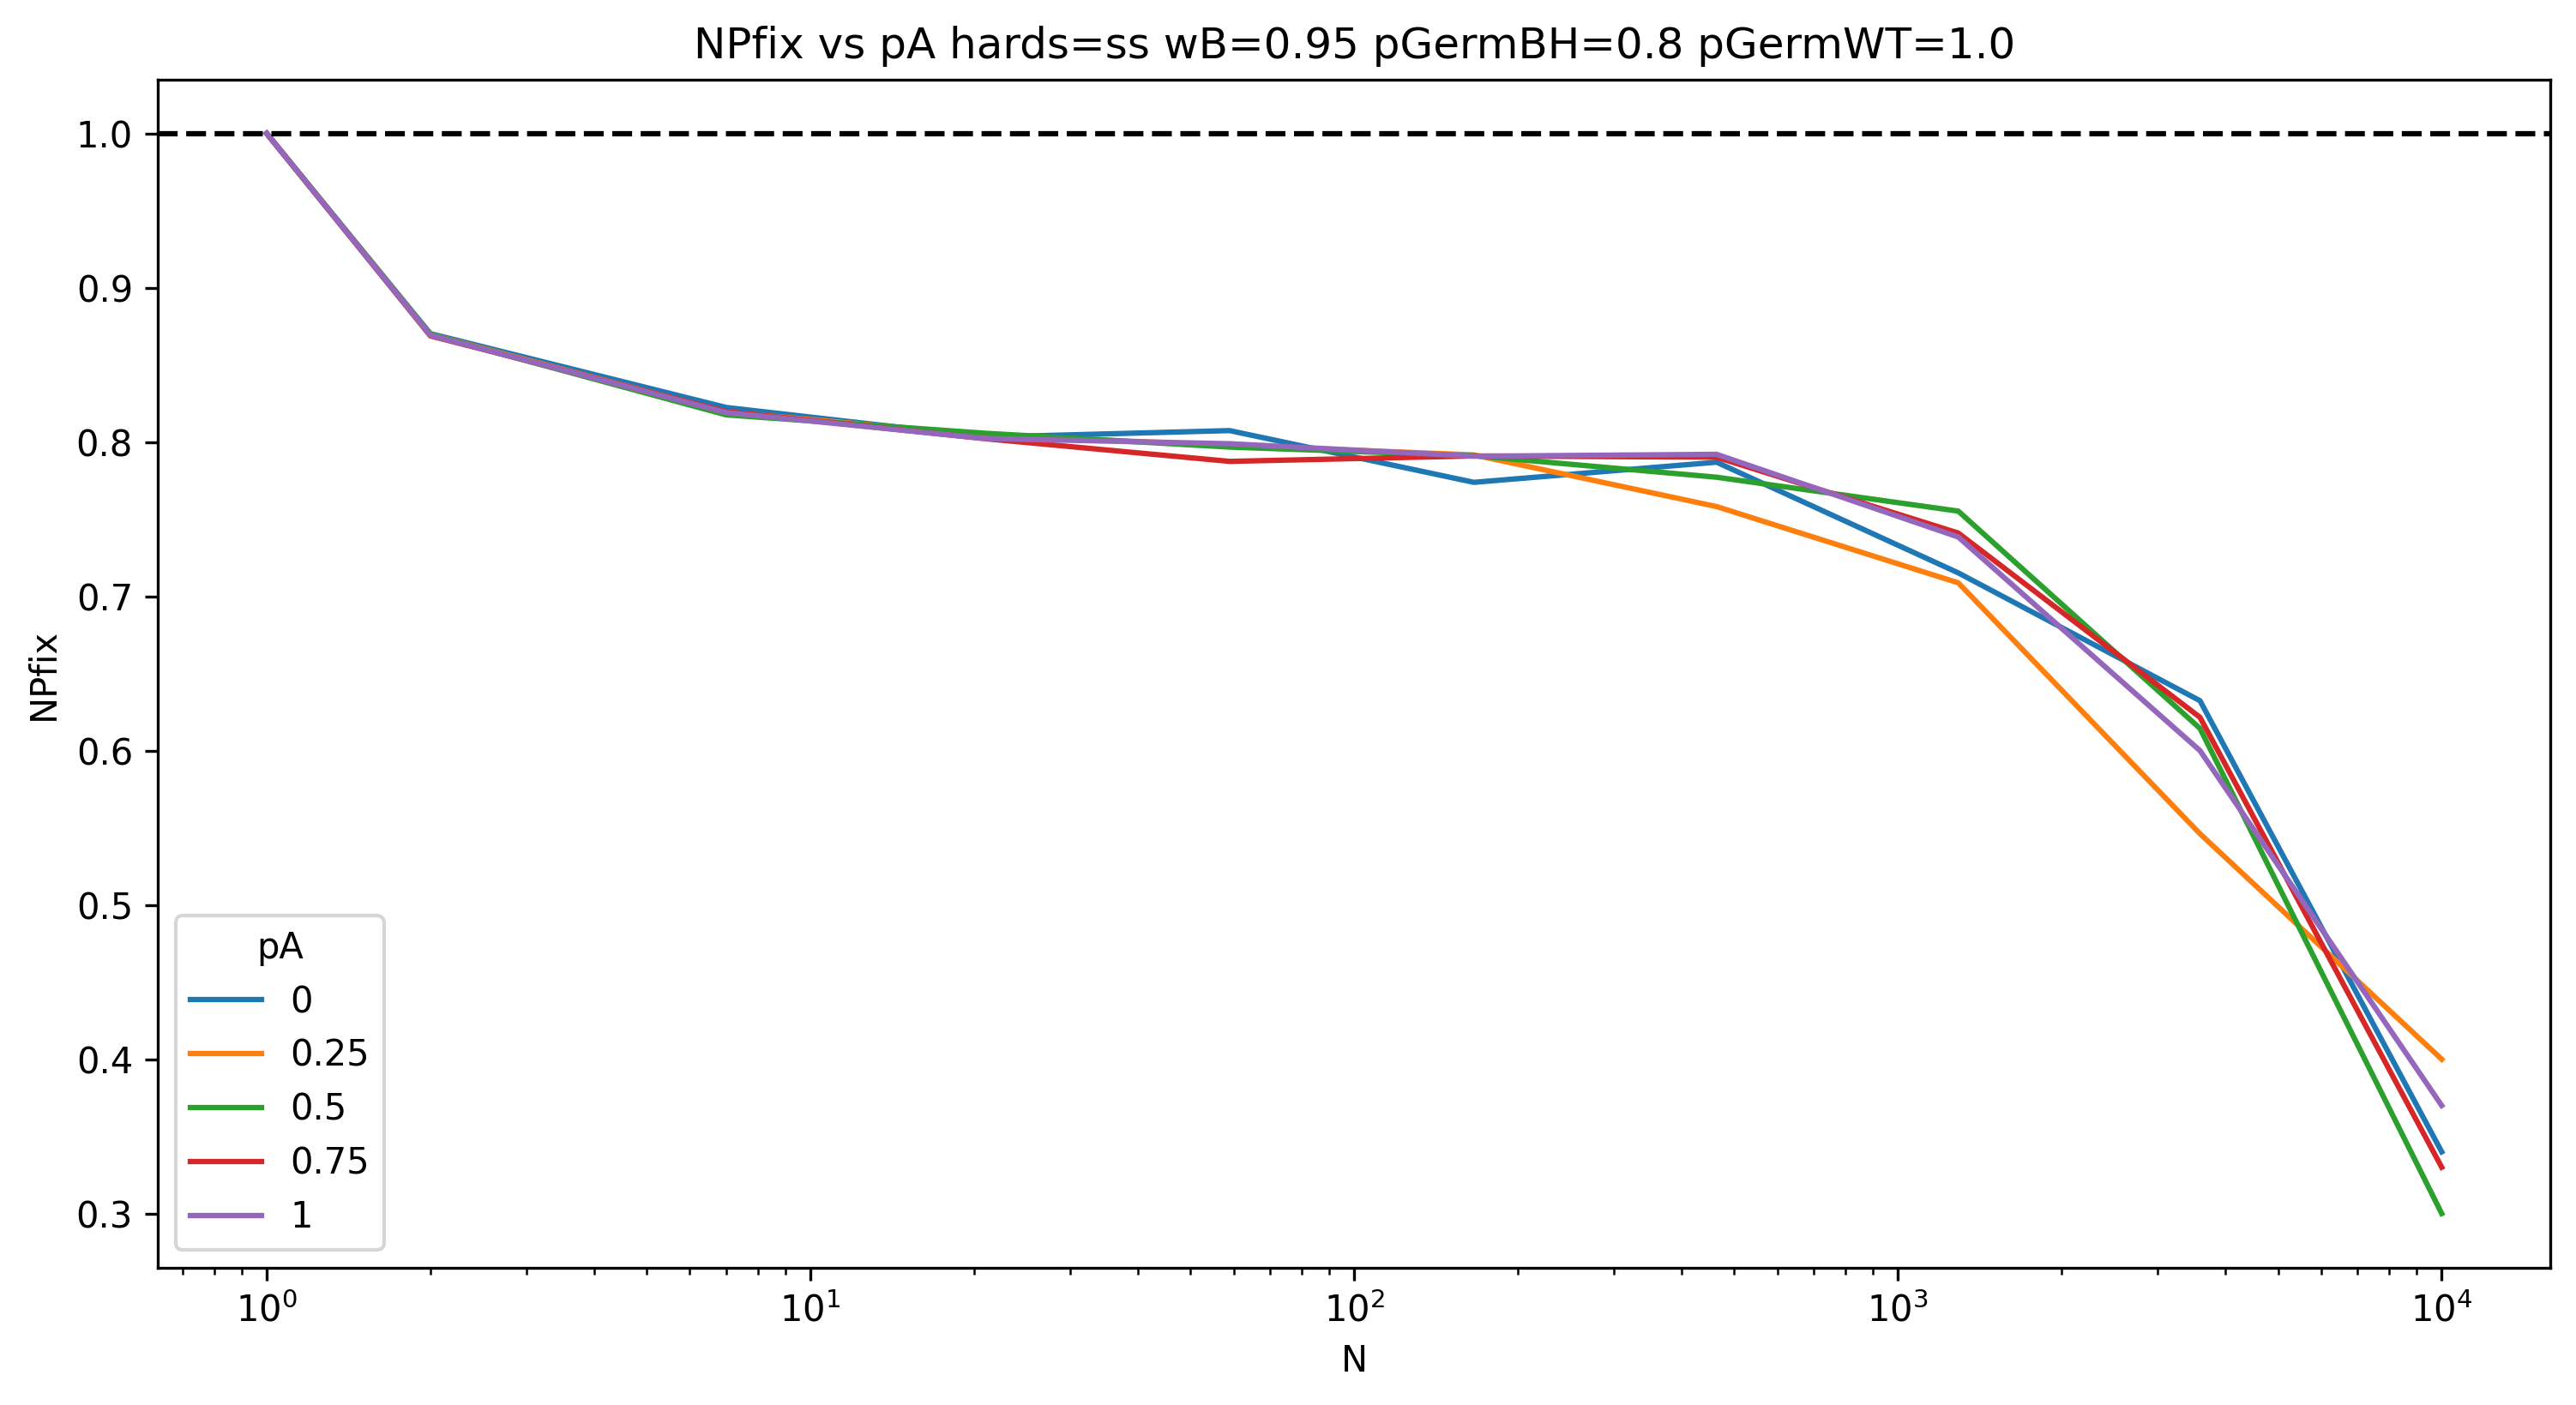

In [82]:
filter_params = {
    'hards': 'ss',
    'wB': 0.95,
    'pGermBH': 0.8,
    'pGermWT': 1.0
}
filter_params_flattened = flatten_items(filter_params)
plot_npfix(filter_df(df, *filter_params_flattened),
           'pA', all_pA,
           'NPfix_vs_pA_' +
           '_'.join([f'{k}={v}' for k, v in filter_params.items()]),
           save=False, log=False)

### Npfix, neutral pGerm, hard selection (exponential advantage in WT?)

In [83]:
def plot_npfix_neutral_pgerm(df, title, save=False, log=True):
    # plot NPfix vs N for each value of pGerm
    fig, ax = plt.subplots(dpi=300, figsize=(12, 6))
    for pGerm in all_pGermWT:
        sub_df = df[df['pGermBH'] == pGerm]
        sub_df = sub_df[sub_df['pGermWT'] == pGerm]
        ax.plot(sub_df['N'], sub_df['NPfix'], label=pGerm)
    # add horizontal line for neutral
    ax.axhline(y=1, color='black', linestyle='--')
    ax.set_xscale('log')
    if log:
        ax.set_yscale('log')
    ax.set_xlabel('N')
    ax.set_ylabel('NPfix')
    ax.set_title(title.replace('_', ' '))
    ax.legend(title='pGerms')
    if save:
        plt.savefig(title + '.png')
    plt.show()

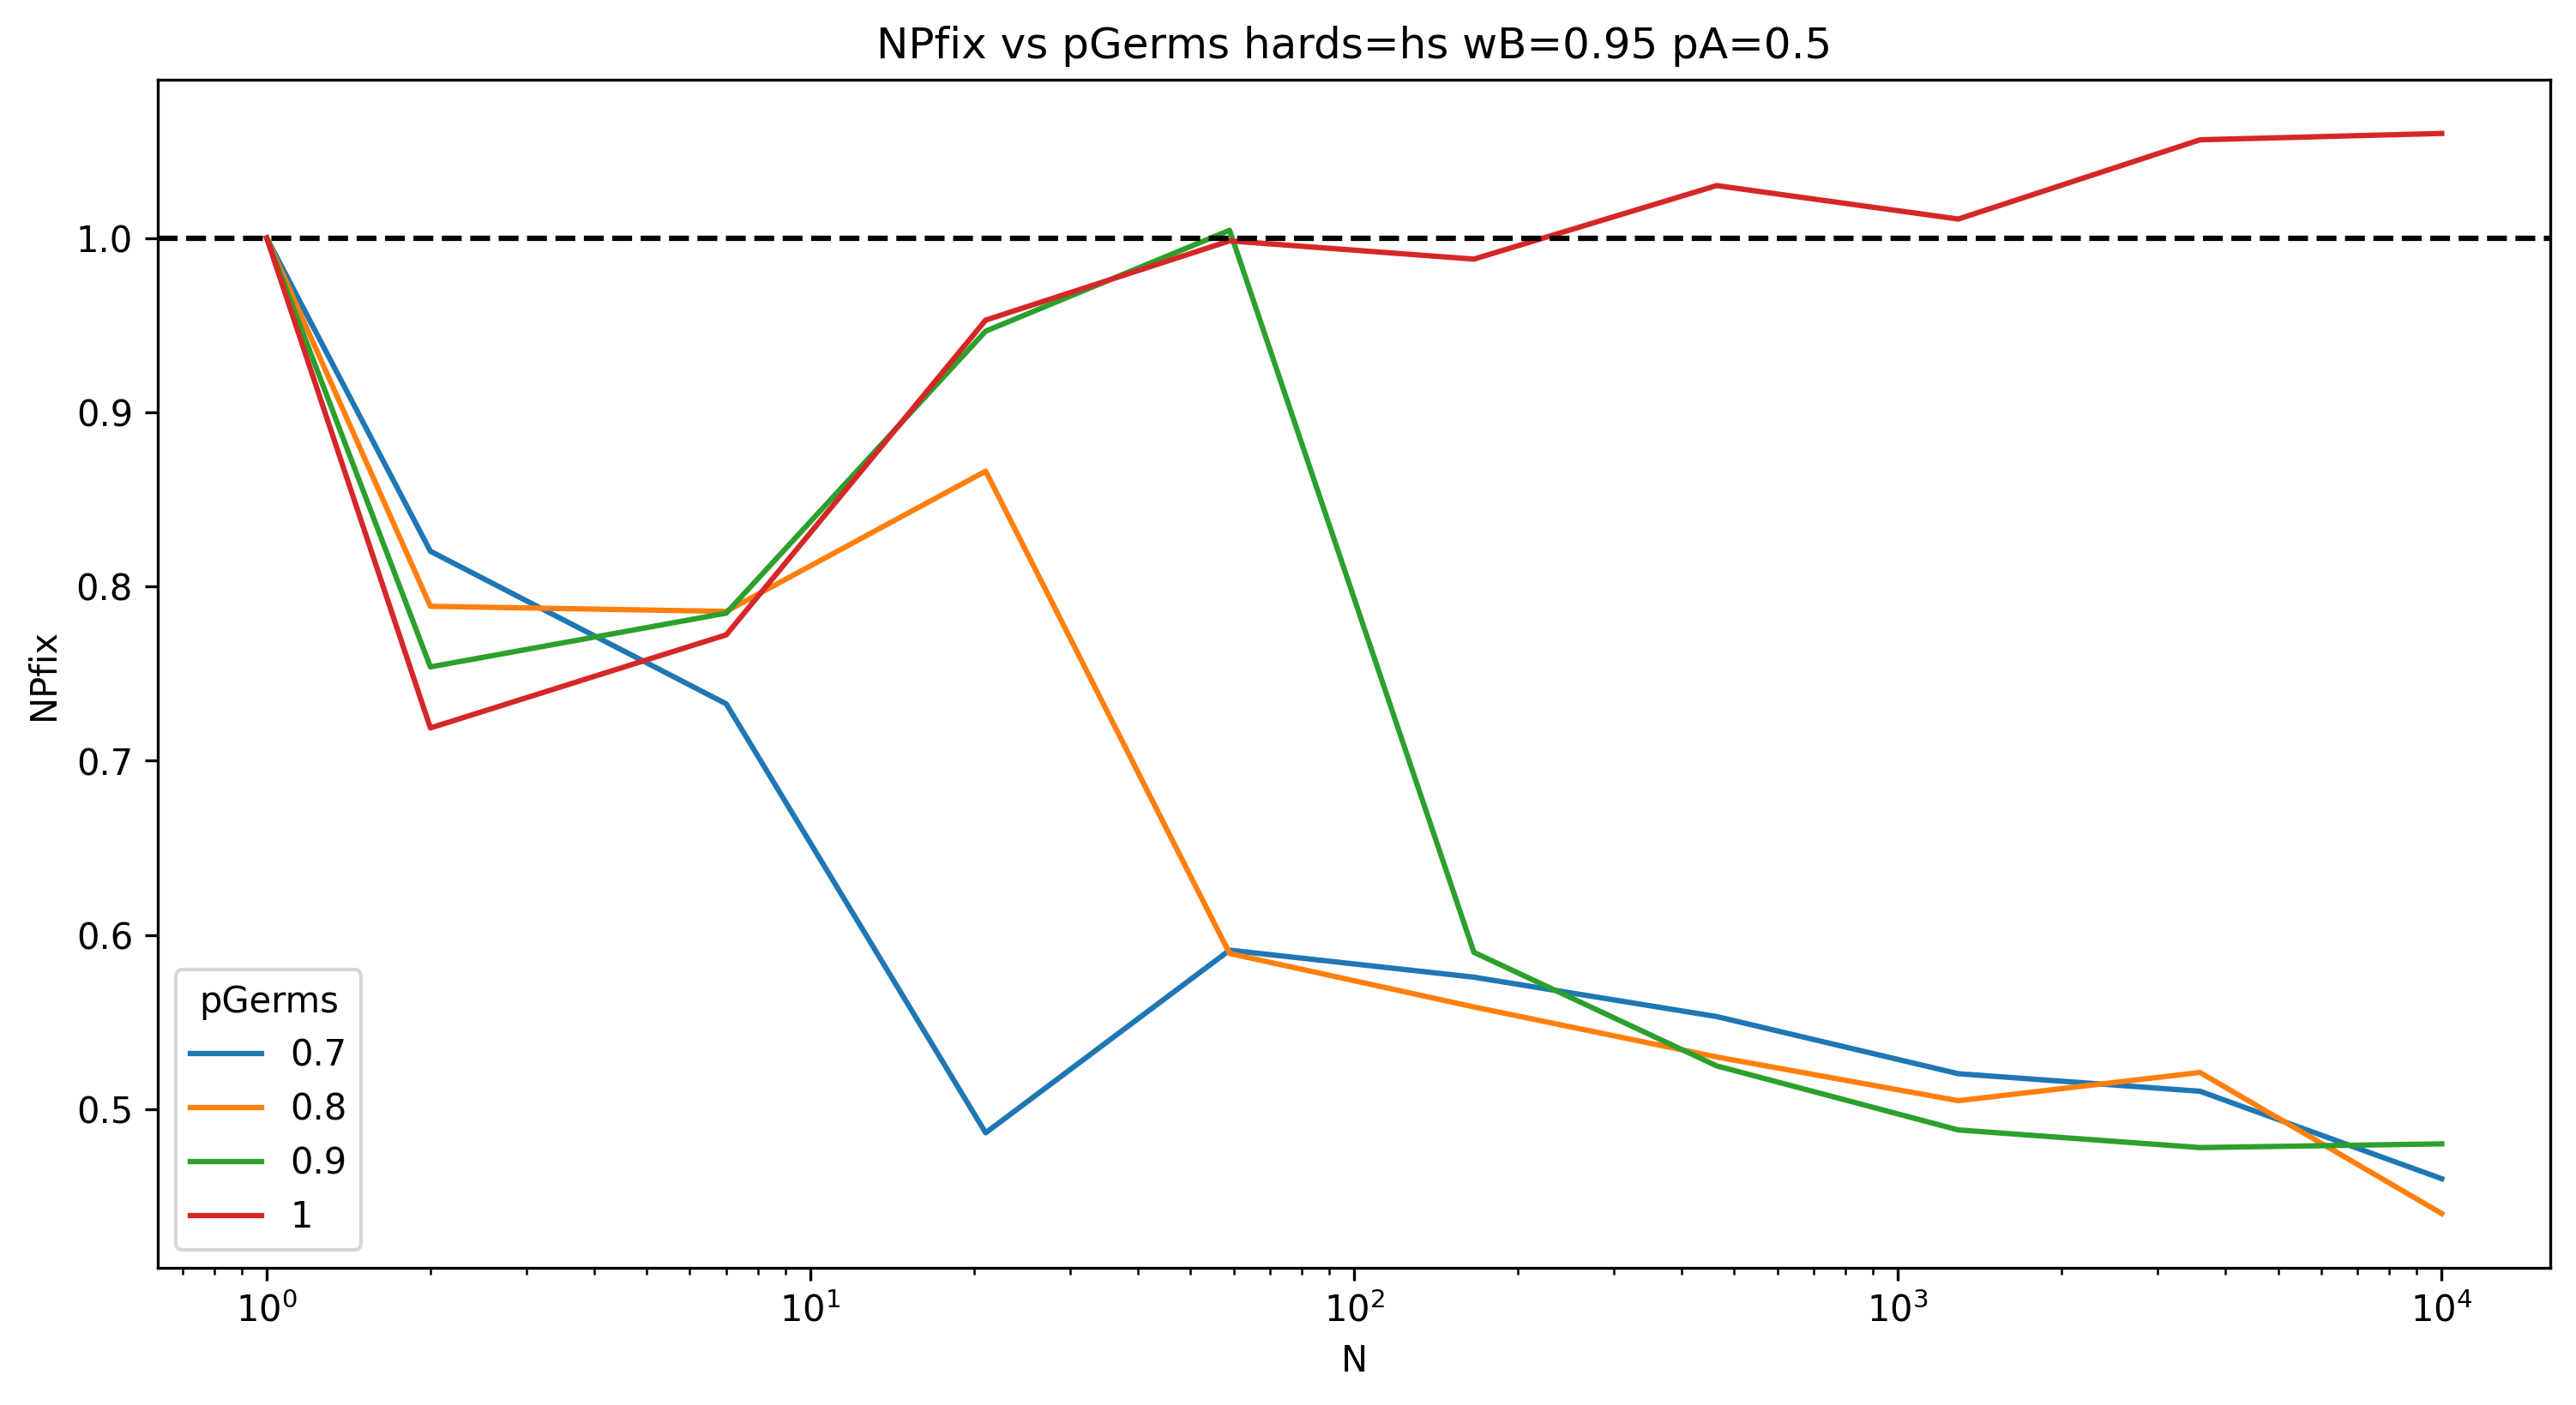

In [89]:
filter_params = {
    'hards': 'hs',
    'wB': 0.95,
    'pA': 0.5,
}
filter_params_flattened = flatten_items(filter_params)
plot_npfix_neutral_pgerm(filter_df(df, *filter_params_flattened),
           'NPfix_vs_pGerms_' +
           '_'.join([f'{k}={v}' for k, v in filter_params.items()]),
           save=False, log=False)

### Npfix, neutral pGerm, soft selection

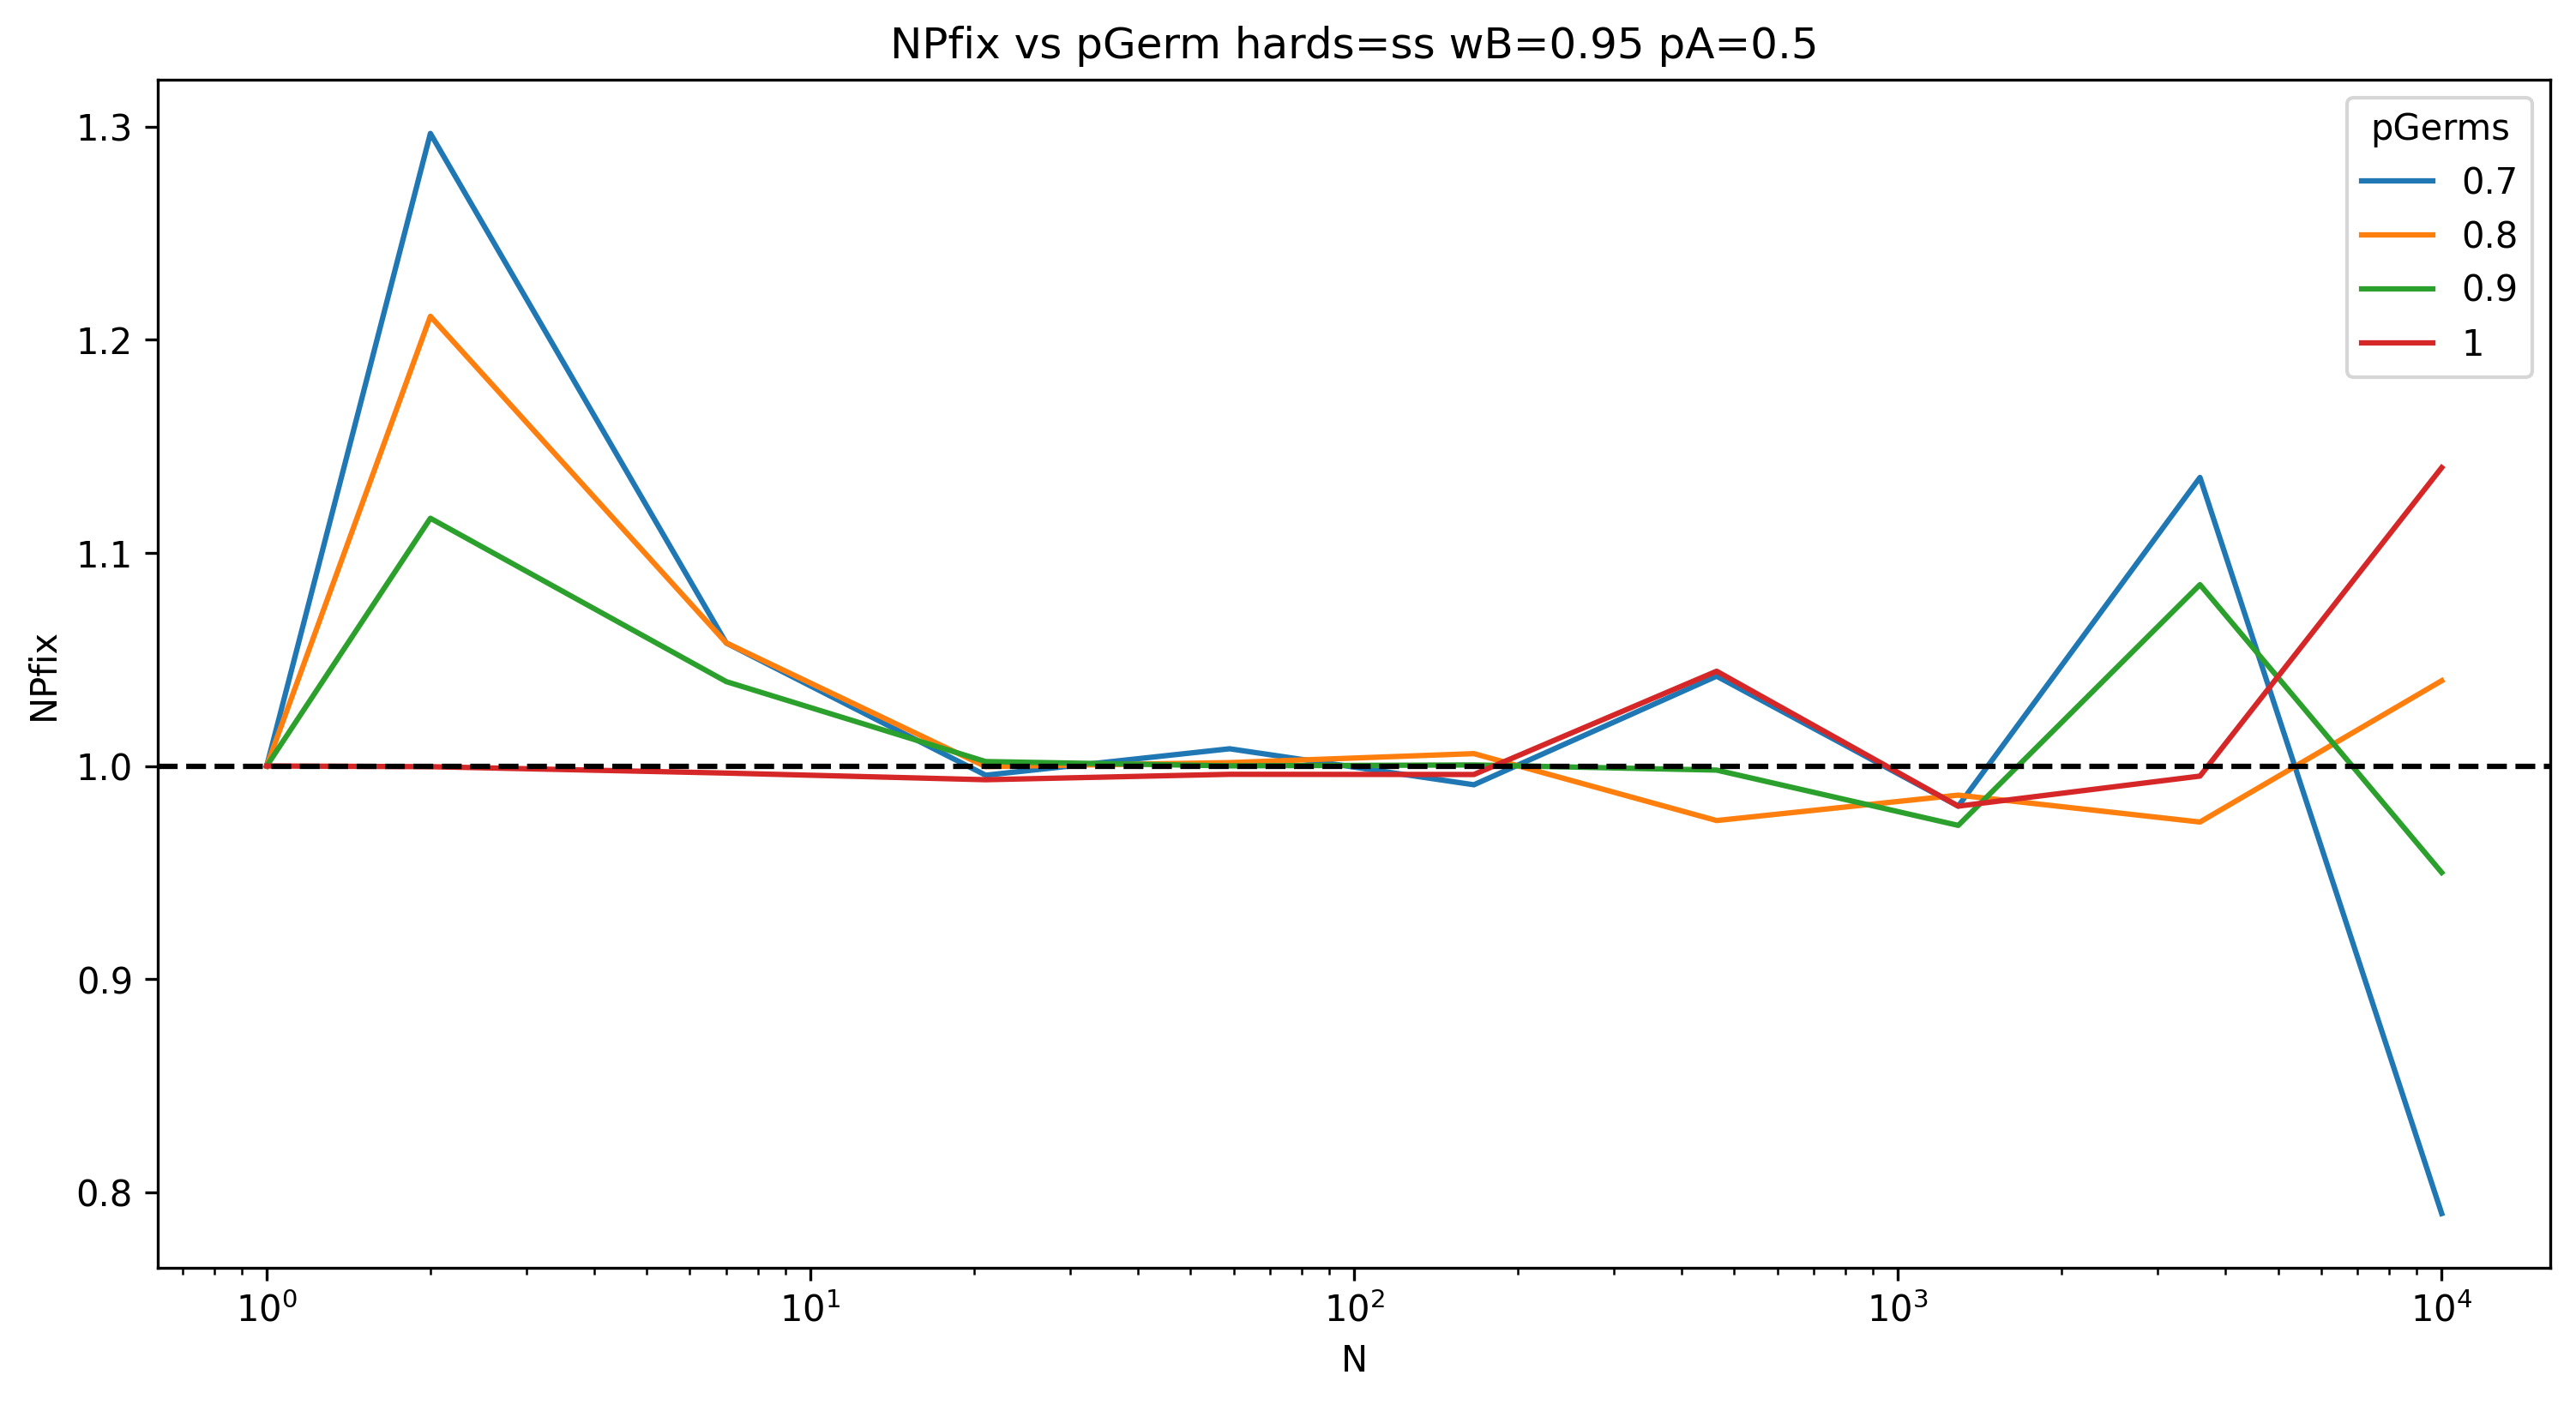

In [90]:
filter_params = {
    'hards': 'ss',
    'wB': 0.95,
    'pA': 0.5,
}
filter_params_flattened = flatten_items(filter_params)
plot_npfix_neutral_pgerm(filter_df(df, *filter_params_flattened),
           'NPfix_vs_pGerm_' +
           '_'.join([f'{k}={v}' for k, v in filter_params.items()]),
           save=False, log=False)